In [9]:
import matplotlib.pyplot as plt
import perfplot

# Run other ipynb file to have access to its functions
%run Gorilla_random_generator.ipynb
%run Gorilla_functions_clean.ipynb
# Generate a list of random meters
random_meters = generate_random_meters(10)
# random_meters.head()

# Generate mock consumption data 
start_date_example = '2020-06-01'
duration_days_example = 2000

mock_consumption_data = generate_mock_consumption_data(random_meters, start_date_example, duration_days_example)
# mock_consumption_data.head(10)
meter_ids_list = random_meters['meter_id'].to_list()
df_results_random = get_results_for_multiple_ids(random_meters, meter_ids_list, mock_consumption_data, rate_data, start_date="04/05/2022", end_date="05/10/2022")
df_results_random.head()

,meter_id,total_kwh,total_charge_pounds
0,12460524,17114.640567,40.99
1,29584993,14357.322614,65.29
2,40402569,16329.033839,70.37
3,44766231,14513.657899,45.23
4,50492143,15523.728351,60.40


Output()

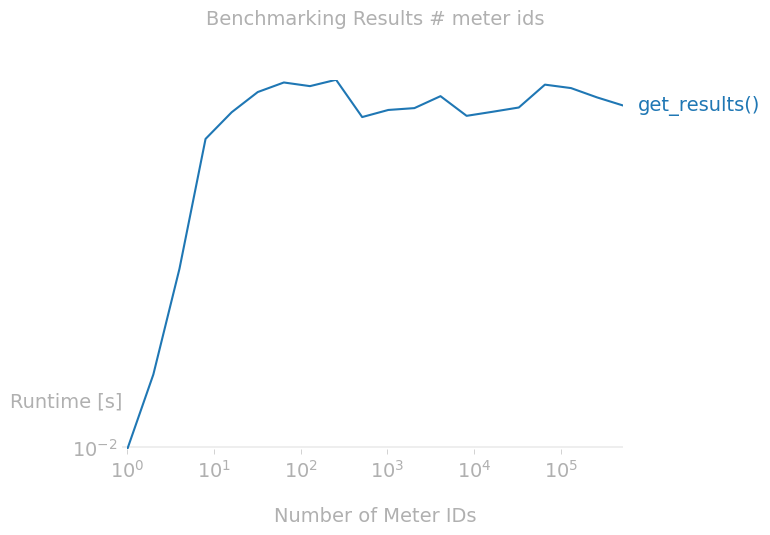

In [2]:
# Wrapper function for benchmarking get_results_for_multiple_ids
def bench(n, meter_ids_list, mock_consumption_data, rate_data):
    _ = get_results_for_multiple_ids(random_meters, meter_ids_list[:n], mock_consumption_data, rate_data, start_date="01/04/2020", end_date="2025-01-03")

# Vary the number of meter_ids
num_meter_ids_range = [2**k for k in range(20)]

# Plot the results
perfplot.show(
    setup=lambda n: n,  # Input size is the number of meter_ids
    n_range=num_meter_ids_range,  # Vary the number of meter_ids
    xlabel='Number of Meter IDs',
    title='Benchmarking Results # meter ids',
    target_time_per_measurement=0.1,  # Adjust as needed based on expected execution times
    kernels=[
        lambda n: bench(n, meter_ids_list, mock_consumption_data, rate_data)  # Wrap the call in a lambda
    ],
    labels=['get_results()']  # Specify the label for the kernel
)


Output()

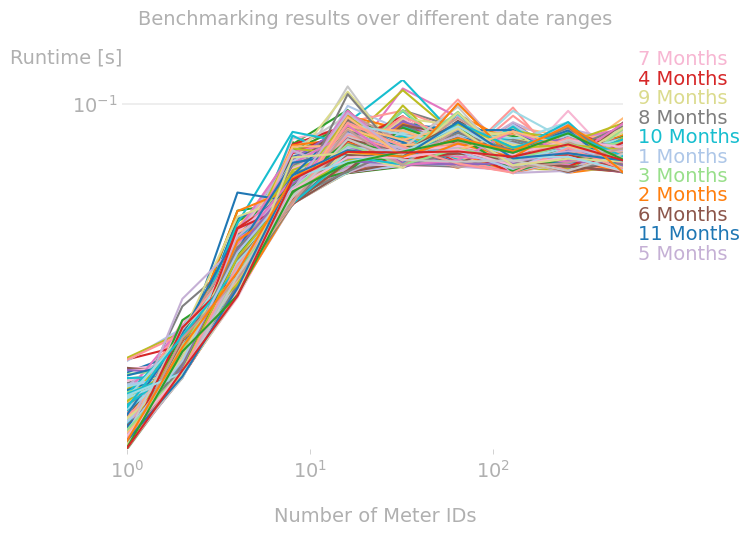

In [3]:
# Wrapper function for benchmarking get_results_for_multiple_ids with varied duration
def bench_duration(n, duration_days, meter_ids_list, rate_data):
    # Generate mock consumption data with the specified duration
    mock_consumption_data = generate_mock_consumption_data(random_meters, '2020-04-01', duration_days)

    # Benchmark get_results_for_multiple_ids
    _ = get_results_for_multiple_ids(random_meters, meter_ids_list[:n], mock_consumption_data, rate_data, start_date="01/04/2020", end_date="2025-01-03")

# Vary the duration of consumption data
duration_days_range = list(range(1, 365))  # Vary from 1 to 365 days

# Plot the results
perfplot.show(
    setup=lambda n: n,  # Input size is the number of meter_ids
    n_range=[2**k for k in range(10)],  # Vary the number of meter_ids
    xlabel='Number of Meter IDs',
    title='Benchmarking results over different date ranges',
    target_time_per_measurement=0.01,  # Adjust as needed based on expected execution times
    kernels=[
        lambda n: bench_duration(n, days, meter_ids_list, rate_data)  # Wrap the call in a lambda
        for days in duration_days_range
    ],
    labels=[f'{int(days // 30.4167)} Months' if days % 31 == 0 else '' for days in duration_days_range],
    equality_check=None  # Set equality_check to None
)


In [ ]:
import matplotlib.pyplot as plt
import timeit

# Wrapper function for benchmarking get_results_for_multiple_ids with varied duration
def bench_duration(n, duration_days, meter_ids_list, rate_data):
    # Generate mock consumption data with the specified duration
    mock_consumption_data = generate_mock_consumption_data(random_meters, '2020-04-01', duration_days)

    # Benchmark get_results_for_multiple_ids
    start_time = timeit.default_timer()
    _ = get_results_for_multiple_ids(random_meters, meter_ids_list[:n], mock_consumption_data, rate_data, start_date="01/04/2020", end_date="2025-01-03")
    elapsed_time = timeit.default_timer() - start_time

    return elapsed_time

# Vary the duration of consumption data
duration_days_range = list(range(1, 365))  # Vary from 1 to 365 days

# Benchmarking results
num_meter_ids_range = [2**k for k in range(10)]  # Vary the number of meter_ids

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))

for days in duration_days_range:
    times = [bench_duration(n, days, meter_ids_list, rate_data) for n in num_meter_ids_range]
    plt.plot(num_meter_ids_range, times, label=f'{int(days // 30.4167)} Months' if days % 31 == 0 else '')

plt.xlabel('Number of Meter IDs')
plt.ylabel('Execution Time (s)')
plt.title('Benchmarking results over different date ranges')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

There is a linear increase in computing time for executing the get_results_for_multiple_ids() function. 

This benchmark does not work properly! It goes linear until the amount of meter_ids I created myself as input in the random_meter generator 